# Gaussian denoising

In [1]:
!which python

/home/vruiz/enviroments/SM/bin/python


In [2]:
!pip install --upgrade pip

In [3]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2
import time
import kernels
import _2D_denoising

In [4]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [5]:
sigma = 1.0

[1.33830625e-04 4.43186162e-03 5.39911274e-02 2.41971446e-01
 3.98943469e-01 2.41971446e-01 5.39911274e-02 4.43186162e-03
 1.33830625e-04]
1.0


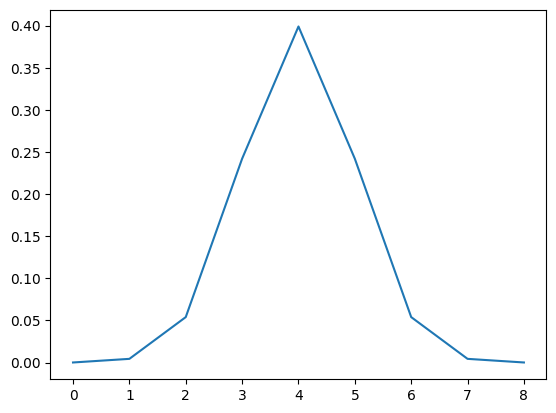

In [6]:
kernel = kernels.get_gaussian_kernel(sigma) #compute_gaussian_kernel(sigma)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [7]:
!wget http://www.hpca.ual.es/~vruiz/images/barb.png

--2023-01-22 17:12:24--  http://www.hpca.ual.es/~vruiz/images/barb.png
Resolviendo www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Conectando con www.hpca.ual.es (www.hpca.ual.es)[150.214.150.42]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 232140 (227K) [image/png]
Grabando a: «barb.png.15»

barb.png.15         100%[===================>] 226,70K  1,34MB/s    en 0,2s    

2023-01-22 17:12:24 (1,34 MB/s) - «barb.png.15» guardado [232140/232140]



In [8]:
img = gray_image.read("barb.png")

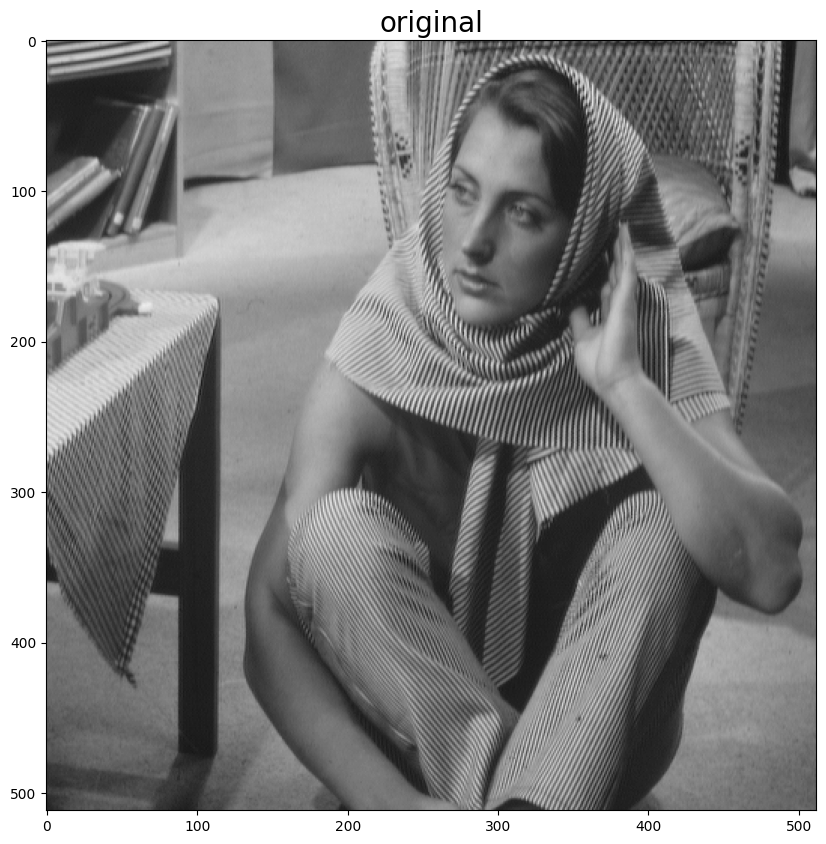

In [9]:
gray_image.show(img, "original")

In [10]:
mean = 0
var = 100
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = img + noise

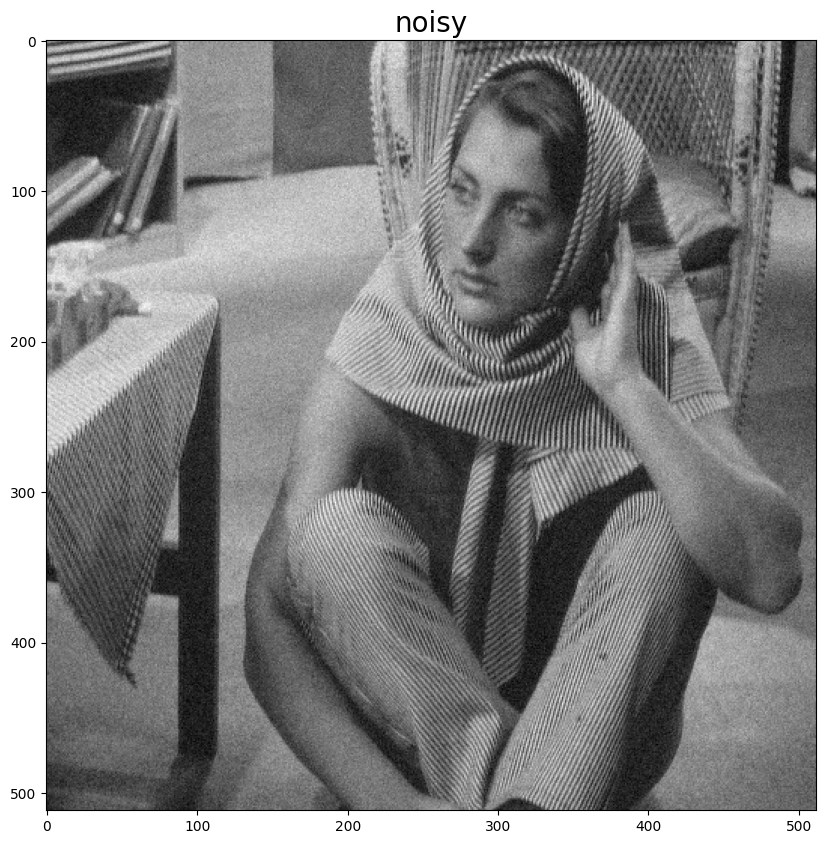

In [11]:
gray_image.show(noisy_img, "noisy")

In [12]:
denoised_img = _2D_denoising.filter(noisy_img, kernel)

image.shape=(512, 512) kernel.shape=(9,)
................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
..............................................................................................................................................................................................................................................................................................................................................................................................................................................................

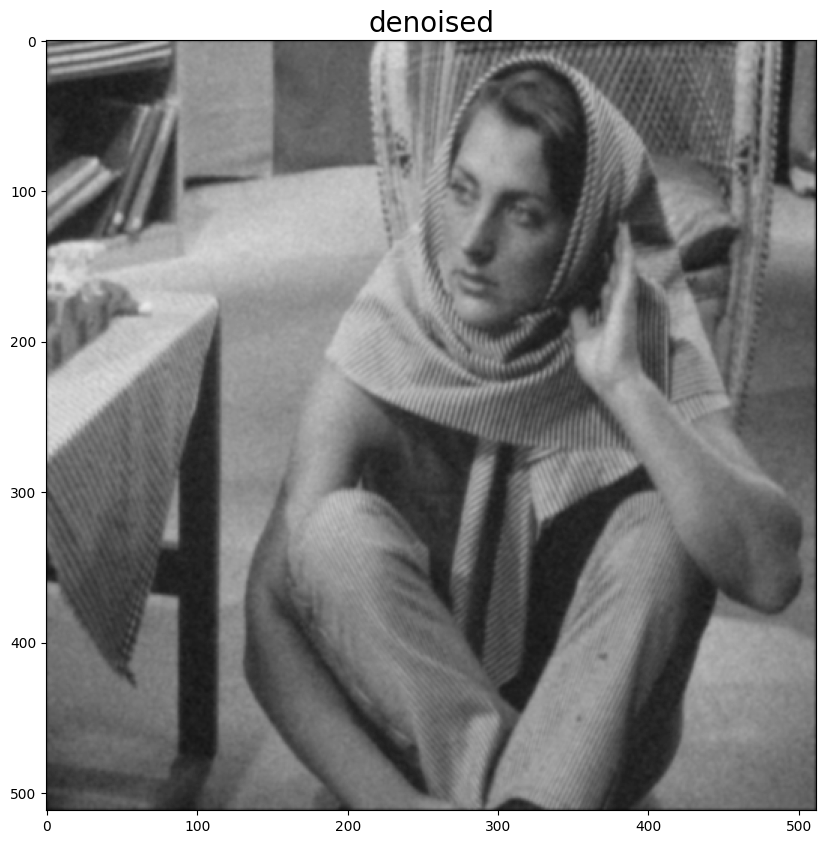

In [13]:
gray_image.show(denoised_img, "denoised")

In [14]:
print(f"time: {time.process_time()} seconds")

time: 10.63630733 seconds
